<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/classdemo/residuals_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pylab as plt

In [41]:
np.random.seed(302)
x = np.arange(100)
y = np.random.randn(100) + x / 10


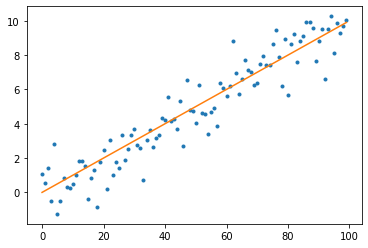

In [42]:
plt.plot(x, y, '.')
plt.plot(x, x/10)

In [43]:
residuals = y - x/10

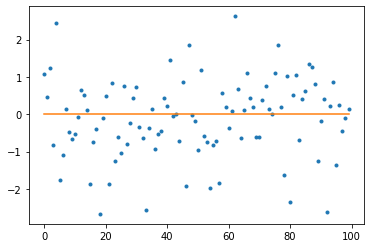

In [44]:
plt.plot(x, residuals, '.')
plt.plot(x, x - x);

In [77]:
def resplot(x, y, fit=False):
  fig = plt.figure(figsize=(10,5))
  left, width = 0.1, 0.65
  bottom, height = 0.1, 0.65
  rect_scatter = [left, bottom + 0.3, width, height]
  rect_histx = [left, bottom, width, 0.3]
  #    rect_histy = [left_h, bottom, 0.2, height]
  plt.subplots_adjust(hspace=0., wspace=0.1)
  ax = plt.axes(rect_scatter)
  axres = plt.axes(rect_histx)
  ax.minorticks_on()
  axres.minorticks_on()
  plt.setp(ax.get_xticklabels(),
            visible=False)
  ax.plot(x, y, '.')
  ax.plot(x, x/10) 
  residuals = y - x/10
  axres.plot(x, residuals, '.')
  axres.plot(x, x - x);

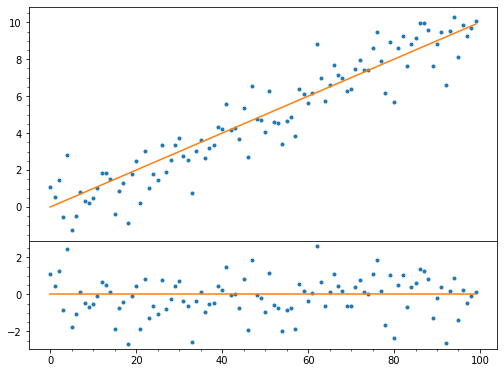

In [78]:
resplot(x, y)

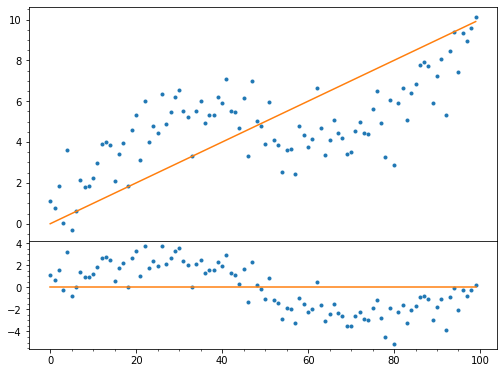

In [79]:
np.random.seed(302)
y2 = np.random.randn(100) + x / 10 + 3*np.sin(x / np.pi / 5)
resplot(x, y2)

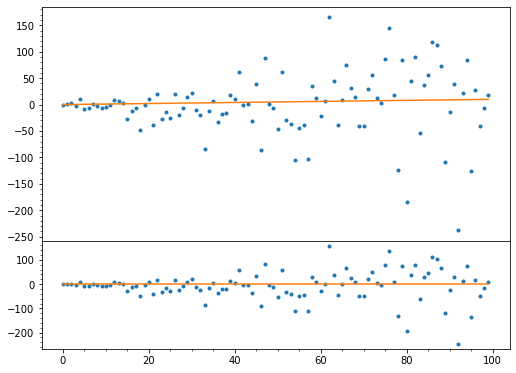

In [80]:
np.random.seed(302)
y3 = np.random.randn(100) * x + x / 30 
resplot(x, y3)

In [81]:
import statsmodels.api as sm

In [87]:
ml = sm.OLS(endog=x, exog=y).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2905.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                    3.52e-75
Time:                        14:38:51   Log-Likelihood:                         -376.09
No. Observations:                 100   AIC:                                      754.2
Df Residuals:                      99   BIC:                                      756.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.7359      0.181     53.900      0.000       9.377      10.094
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.057
Skew:                           0.200   Prob(JB):                        0.590
Kurtosis:                       3.307   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
from statsmodels import stats as sms
name = ['Jarque-Bera', 'Skew', 'Kurtosis', 'Chi^2 two-tail prob.', ]
jbtest = sms.stattools.jarque_bera(ml.resid)
print("Jarque-Bera test of residuals", 
      "JB statistics value {0:.2}, skewness {2:.2}, Kurtosis {3:.2}, \nChi2 probability {1:.2}".format(   
      *jbtest)
      )

omnitest = sms.stattools.omni_normtest(ml.resid)
print("Omni test : Chi2 probability {:.2}".format(omnitest[1])) 

Jarque-Bera test of residuals JB statistics value 1.1, skewness 0.2, Kurtosis 3.3, 
Chi2 probability 0.59
Omni test : Chi2 probability 0.45


In [97]:
ml2 = sm.OLS(endog=x, exog=y2).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              608.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                    4.56e-44
Time:                        14:41:32   Log-Likelihood:                         -448.40
No. Observations:                 100   AIC:                                      898.8
Df Residuals:                      99   BIC:                                      901.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.0970      0.409     24.667      0.000       9.285      10.909
==============================================================================
Omnibus:                       13.460   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.173
Skew:                           0.074   Prob(JB):                        0.124
Kurtosis:                       2.010   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
jbtest2 = sms.stattools.jarque_bera(ml2.resid)
print("Jarque-Bera test of residuals", 
      "JB statistics value {0:.2}, skewness {2:.2}, Kurtosis {3:.2}, \nChi2 probability {1:.2}".format(   
      *jbtest2)
      )

omnitest2 = sms.stattools.omni_normtest(ml2.resid)
print("Omni test : Chi2 probability {:.2}".format(omnitest2[1])) 

Jarque-Bera test of residuals JB statistics value 4.2, skewness 0.074, Kurtosis 2.0, 
Chi2 probability 0.12
Omni test : Chi2 probability 0.0012


In [99]:
ml3 = sm.OLS(endog=x, exog=y3).fit()
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.009
Method:                 Least Squares   F-statistic:                            0.08129
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                       0.776
Time:                        14:42:41   Log-Likelihood:                         -546.69
No. Observations:                 100   AIC:                                      1095.
Df Residuals:                      99   BIC:                                      1098.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0277      0.097      0.285      0.776      -0.165       0.220
==============================================================================
Omnibus:                       28.185   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.624
Skew:                           0.011   Prob(JB):                       0.0601
Kurtosis:                       1.838   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
jbtest3 = sms.stattools.jarque_bera(ml3.resid)
print("Jarque-Bera test of residuals", 
      "JB statistics value {0:.2}, skewness {2:.2}, Kurtosis {3:.2}, \nChi2 probability {1:.2}".format(   
      *jbtest3)
      )

omnitest3 = sms.stattools.omni_normtest(ml3.resid)
print("Omni test : Chi2 probability {:.2}".format(omnitest3[1])) 

Jarque-Bera test of residuals JB statistics value 5.6, skewness 0.011, Kurtosis 1.8, 
Chi2 probability 0.06
Omni test : Chi2 probability 7.6e-07
